# Multi-Layered Neural Network
In this model creation Two hidden Layers are used.

In [1]:
from sklearn.datasets import make_classification

# Generating the data

In [2]:
X,y = make_classification(n_samples=50000,n_features=8,n_informative=8,n_redundant=0,n_clusters_per_class=2,random_state=26)

# Visualising the data

In [3]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

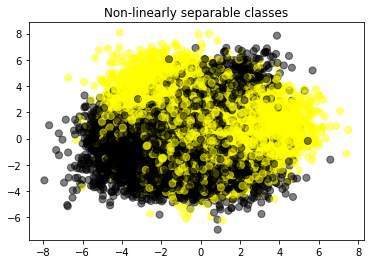

In [4]:
colors=["black","yellow"]
cmap = ListedColormap(colors)
plt.figure()
plt.title('Non-linearly separable classes')
plt.scatter(X[:,0],X[:,1],c=y,marker='o',s=50,cmap=cmap,alpha=0.5)

Conclusion can be drawn from the plot : the data is not linearly seperable i.e, simply logistic regression may not classify this data accurately as no clear linear boundary separates the data

# Train Test Split

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)

# Getting Dimension Right

In [6]:
X_train = X_train.T
y_train = y_train.reshape(1,len(y_train))
X_test = X_test.T
y_test = y_test.reshape(1,len(y_test))

In [7]:
X_train.shape

(8, 37500)

In [8]:
y_train.shape

(1, 37500)

In [9]:
X_test.shape

(8, 12500)

In [10]:
y_test.shape

(1, 12500)

# Defining Placeholders

In [11]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [12]:
def placeholders(num_features):
    A_0 = tf.placeholder(dtype=tf.float64,shape=([num_features,None]))
    Y = tf.placeholder(dtype=tf.float64,shape=([1,None]))
    return A_0,Y

# Defining Layer Dimension

In [13]:
layer_dims = [8,8,8,1]

# Initialising Weights and Bias

In [14]:
def initialize_parameters_deep(layer_dims):
    L = len(layer_dims)
    print("length inside initial parameter deep",L)
    parameters = {}
    for i in range(1,L):
        parameters['W'+str(i)] = tf.Variable(initial_value=tf.random_normal([layer_dims[i],layer_dims[i-1]],dtype=tf.float64)*0.01)
        parameters['b'+str(i)] = tf.Variable(initial_value=tf.zeros([layer_dims[i],1],dtype=tf.float64)*0.01)
    return parameters

# Forward Propagation for one layer

In [15]:
def linear_forward_propagation(A_prev,W,b,activation):
    Z = tf.add(tf.matmul(W,A_prev),b)
    if activation=="sigmoid":
        A=Z
    elif activation=="relu":
        A=tf.nn.relu(Z)
    return A
    

# Forward Propagation Across the Network
here we will use linear_forward_propagation for one layer for each layer

In [16]:
def l_layer_forwardProp(A_0,parameters):
    A = A_0
    L = len(parameters)//2
    print("length",L)
    for i in range(1,L):
        A_prev = A
        A = linear_forward_propagation(A,parameters['W'+str(i)],parameters['b'+str(i)],"relu")
    A = linear_forward_propagation(A,parameters['W'+str(L)],parameters['b'+str(L)],"sigmoid")
    return A    

# Defining Model

In [17]:
def deep_model(X_train,Y_train,X_test,Y_test,layer_dims,learning_rate,num_iter):
    num_features = layer_dims[0]
    A_0,Y = placeholders(num_features)
    parameters = initialize_parameters_deep(layer_dims)
    Z_final = l_layer_forwardProp(A_0,parameters)
    cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=Z_final,labels=Y))
    train_net = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        for i in range(num_iter):
            _,c=sess.run([train_net,cost],feed_dict={A_0:X_train,Y:Y_train})
            if i%1000==0:
                print(c)
            correct_prediction = tf.equal(tf.round(tf.sigmoid(Z_final)),Y)
            #Calculate Accuracy
            accuracy = tf.reduce_mean(tf.cast(correct_prediction,"float"))
            print("Accuracy on testset:",accuracy.eval({A_0:X_test,Y:Y_test}))
    

# Implementation of model

In [18]:
deep_model(X_train,y_train,X_test,y_test,layer_dims,0.2,5000)

length inside initial parameter deep 4
length 3
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
0.6931480686337204
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.4993

Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on testset: 0.49936
Accuracy on te

Accuracy on testset: 0.6336
Accuracy on testset: 0.63712
Accuracy on testset: 0.64104
Accuracy on testset: 0.64512
Accuracy on testset: 0.64848
Accuracy on testset: 0.65344
Accuracy on testset: 0.65696
Accuracy on testset: 0.6608
Accuracy on testset: 0.66424
Accuracy on testset: 0.66744
Accuracy on testset: 0.67136
Accuracy on testset: 0.67432
Accuracy on testset: 0.67776
Accuracy on testset: 0.68048
Accuracy on testset: 0.68296
Accuracy on testset: 0.68672
Accuracy on testset: 0.6892
Accuracy on testset: 0.69272
Accuracy on testset: 0.69608
Accuracy on testset: 0.69824
Accuracy on testset: 0.70104
Accuracy on testset: 0.70352
Accuracy on testset: 0.70608
Accuracy on testset: 0.70856
Accuracy on testset: 0.71184
Accuracy on testset: 0.7144
Accuracy on testset: 0.71672
Accuracy on testset: 0.71808
Accuracy on testset: 0.72064
Accuracy on testset: 0.7236
Accuracy on testset: 0.72576
Accuracy on testset: 0.7276
Accuracy on testset: 0.72856
Accuracy on testset: 0.73056
Accuracy on testset:

Accuracy on testset: 0.86056
Accuracy on testset: 0.86112
Accuracy on testset: 0.86192
Accuracy on testset: 0.86264
Accuracy on testset: 0.86312
Accuracy on testset: 0.86296
Accuracy on testset: 0.86352
Accuracy on testset: 0.86384
Accuracy on testset: 0.86448
Accuracy on testset: 0.86504
Accuracy on testset: 0.8656
Accuracy on testset: 0.866
Accuracy on testset: 0.86648
Accuracy on testset: 0.86664
Accuracy on testset: 0.86648
Accuracy on testset: 0.86712
Accuracy on testset: 0.86824
Accuracy on testset: 0.8688
Accuracy on testset: 0.86944
Accuracy on testset: 0.87
Accuracy on testset: 0.87016
Accuracy on testset: 0.87064
Accuracy on testset: 0.87096
Accuracy on testset: 0.87136
Accuracy on testset: 0.8724
Accuracy on testset: 0.87328
Accuracy on testset: 0.8736
Accuracy on testset: 0.87448
Accuracy on testset: 0.87512
Accuracy on testset: 0.87576
Accuracy on testset: 0.8764
Accuracy on testset: 0.8764
Accuracy on testset: 0.87664
Accuracy on testset: 0.8768
Accuracy on testset: 0.877

Accuracy on testset: 0.91352
Accuracy on testset: 0.91016
Accuracy on testset: 0.91384
Accuracy on testset: 0.91128
Accuracy on testset: 0.9148
Accuracy on testset: 0.9116
Accuracy on testset: 0.91504
Accuracy on testset: 0.91208
Accuracy on testset: 0.9156
Accuracy on testset: 0.91216
Accuracy on testset: 0.91568
Accuracy on testset: 0.91248
Accuracy on testset: 0.91544
Accuracy on testset: 0.91232
Accuracy on testset: 0.91568
Accuracy on testset: 0.9124
Accuracy on testset: 0.91512
Accuracy on testset: 0.91224
Accuracy on testset: 0.91504
Accuracy on testset: 0.91232
Accuracy on testset: 0.91528
Accuracy on testset: 0.91208
Accuracy on testset: 0.91544
Accuracy on testset: 0.91208
Accuracy on testset: 0.91552
Accuracy on testset: 0.912
Accuracy on testset: 0.91552
Accuracy on testset: 0.912
Accuracy on testset: 0.91568
Accuracy on testset: 0.91192
Accuracy on testset: 0.91544
Accuracy on testset: 0.912
Accuracy on testset: 0.91568
Accuracy on testset: 0.91232
Accuracy on testset: 0.9

Accuracy on testset: 0.92592
Accuracy on testset: 0.9208
Accuracy on testset: 0.92592
Accuracy on testset: 0.92088
Accuracy on testset: 0.92608
Accuracy on testset: 0.92096
Accuracy on testset: 0.926
Accuracy on testset: 0.92096
Accuracy on testset: 0.92592
Accuracy on testset: 0.92088
Accuracy on testset: 0.92616
Accuracy on testset: 0.92088
Accuracy on testset: 0.92616
Accuracy on testset: 0.92104
Accuracy on testset: 0.92624
Accuracy on testset: 0.92104
Accuracy on testset: 0.92632
Accuracy on testset: 0.92104
Accuracy on testset: 0.92632
Accuracy on testset: 0.92112
Accuracy on testset: 0.92608
Accuracy on testset: 0.92112
Accuracy on testset: 0.92624
Accuracy on testset: 0.92104
Accuracy on testset: 0.92632
Accuracy on testset: 0.92128
Accuracy on testset: 0.92632
Accuracy on testset: 0.92128
Accuracy on testset: 0.92648
Accuracy on testset: 0.92144
Accuracy on testset: 0.9268
Accuracy on testset: 0.92168
Accuracy on testset: 0.92688
Accuracy on testset: 0.92192
Accuracy on testse

Accuracy on testset: 0.93008
Accuracy on testset: 0.92568
Accuracy on testset: 0.93008
Accuracy on testset: 0.926
Accuracy on testset: 0.9304
Accuracy on testset: 0.92608
Accuracy on testset: 0.9304
Accuracy on testset: 0.92608
Accuracy on testset: 0.93032
Accuracy on testset: 0.92608
Accuracy on testset: 0.93032
Accuracy on testset: 0.926
Accuracy on testset: 0.9304
Accuracy on testset: 0.926
Accuracy on testset: 0.93024
Accuracy on testset: 0.92584
Accuracy on testset: 0.93
Accuracy on testset: 0.92584
Accuracy on testset: 0.92984
Accuracy on testset: 0.92576
Accuracy on testset: 0.92984
Accuracy on testset: 0.92568
Accuracy on testset: 0.92984
Accuracy on testset: 0.9256
Accuracy on testset: 0.92976
Accuracy on testset: 0.92568
Accuracy on testset: 0.92992
Accuracy on testset: 0.92584
Accuracy on testset: 0.93016
Accuracy on testset: 0.926
Accuracy on testset: 0.93016
Accuracy on testset: 0.92616
Accuracy on testset: 0.93016
Accuracy on testset: 0.92616
Accuracy on testset: 0.93024


Accuracy on testset: 0.92792
Accuracy on testset: 0.93352
Accuracy on testset: 0.92856
Accuracy on testset: 0.93384
Accuracy on testset: 0.9288
Accuracy on testset: 0.9344
Accuracy on testset: 0.9292
Accuracy on testset: 0.93464
Accuracy on testset: 0.9296
Accuracy on testset: 0.93496
Accuracy on testset: 0.9296
Accuracy on testset: 0.93496
Accuracy on testset: 0.9296
Accuracy on testset: 0.93464
Accuracy on testset: 0.92912
Accuracy on testset: 0.93448
Accuracy on testset: 0.92864
Accuracy on testset: 0.93424
Accuracy on testset: 0.92824
Accuracy on testset: 0.934
0.17614450239832127
Accuracy on testset: 0.9276
Accuracy on testset: 0.93368
Accuracy on testset: 0.92728
Accuracy on testset: 0.93344
Accuracy on testset: 0.92712
Accuracy on testset: 0.93328
Accuracy on testset: 0.92704
Accuracy on testset: 0.93336
Accuracy on testset: 0.92736
Accuracy on testset: 0.9336
Accuracy on testset: 0.92776
Accuracy on testset: 0.93392
Accuracy on testset: 0.92848
Accuracy on testset: 0.9344
Accur

Accuracy on testset: 0.9356
Accuracy on testset: 0.93168
Accuracy on testset: 0.93552
Accuracy on testset: 0.93152
Accuracy on testset: 0.93568
Accuracy on testset: 0.93184
Accuracy on testset: 0.93632
Accuracy on testset: 0.93208
Accuracy on testset: 0.93624
Accuracy on testset: 0.93296
Accuracy on testset: 0.93664
Accuracy on testset: 0.93288
Accuracy on testset: 0.93712
Accuracy on testset: 0.93368
Accuracy on testset: 0.93736
Accuracy on testset: 0.93384
Accuracy on testset: 0.93728
Accuracy on testset: 0.93424
Accuracy on testset: 0.9376
Accuracy on testset: 0.93424
Accuracy on testset: 0.93784
Accuracy on testset: 0.93424
Accuracy on testset: 0.93784
Accuracy on testset: 0.93416
Accuracy on testset: 0.93792
Accuracy on testset: 0.93416
Accuracy on testset: 0.93752
Accuracy on testset: 0.93408
Accuracy on testset: 0.9376
Accuracy on testset: 0.934
Accuracy on testset: 0.9376
Accuracy on testset: 0.93352
Accuracy on testset: 0.9372
Accuracy on testset: 0.93288
Accuracy on testset: 

Accuracy on testset: 0.93896
Accuracy on testset: 0.93456
Accuracy on testset: 0.9388
Accuracy on testset: 0.93424
Accuracy on testset: 0.93872
Accuracy on testset: 0.9344
Accuracy on testset: 0.9388
Accuracy on testset: 0.93464
Accuracy on testset: 0.93912
Accuracy on testset: 0.93464
Accuracy on testset: 0.93952
Accuracy on testset: 0.9348
Accuracy on testset: 0.93952
Accuracy on testset: 0.93544
Accuracy on testset: 0.93936
Accuracy on testset: 0.93584
Accuracy on testset: 0.94
Accuracy on testset: 0.93696
Accuracy on testset: 0.93992
Accuracy on testset: 0.93712
Accuracy on testset: 0.94056
Accuracy on testset: 0.93704
Accuracy on testset: 0.94088
Accuracy on testset: 0.9372
Accuracy on testset: 0.94088
Accuracy on testset: 0.93736
Accuracy on testset: 0.94088
Accuracy on testset: 0.93744
Accuracy on testset: 0.94088
Accuracy on testset: 0.9372
Accuracy on testset: 0.94072
Accuracy on testset: 0.93704
Accuracy on testset: 0.94072
Accuracy on testset: 0.9372
Accuracy on testset: 0.9

Accuracy on testset: 0.94128
Accuracy on testset: 0.93688
Accuracy on testset: 0.94128
Accuracy on testset: 0.93696
Accuracy on testset: 0.9412
Accuracy on testset: 0.93704
Accuracy on testset: 0.9412
Accuracy on testset: 0.93688
Accuracy on testset: 0.94144
Accuracy on testset: 0.93744
Accuracy on testset: 0.94176
Accuracy on testset: 0.93776
Accuracy on testset: 0.94176
Accuracy on testset: 0.93816
Accuracy on testset: 0.942
Accuracy on testset: 0.9392
Accuracy on testset: 0.9428
Accuracy on testset: 0.93984
Accuracy on testset: 0.94312
Accuracy on testset: 0.94032
Accuracy on testset: 0.94328
Accuracy on testset: 0.94024
Accuracy on testset: 0.94328
Accuracy on testset: 0.9408
Accuracy on testset: 0.94352
Accuracy on testset: 0.9408
Accuracy on testset: 0.94352
Accuracy on testset: 0.9408
Accuracy on testset: 0.9436
Accuracy on testset: 0.9408
Accuracy on testset: 0.94336
Accuracy on testset: 0.94072
Accuracy on testset: 0.94368
Accuracy on testset: 0.94088
Accuracy on testset: 0.94

Accuracy on testset: 0.94056
Accuracy on testset: 0.94416
Accuracy on testset: 0.94064
Accuracy on testset: 0.94408
Accuracy on testset: 0.94048
Accuracy on testset: 0.94392
Accuracy on testset: 0.94032
Accuracy on testset: 0.94392
Accuracy on testset: 0.94048
Accuracy on testset: 0.94376
Accuracy on testset: 0.9404
Accuracy on testset: 0.94384
Accuracy on testset: 0.94032
Accuracy on testset: 0.94392
Accuracy on testset: 0.94032
Accuracy on testset: 0.944
Accuracy on testset: 0.9404
Accuracy on testset: 0.944
Accuracy on testset: 0.9404
Accuracy on testset: 0.944
Accuracy on testset: 0.94048
Accuracy on testset: 0.94424
Accuracy on testset: 0.94056
Accuracy on testset: 0.94432
Accuracy on testset: 0.94056
Accuracy on testset: 0.94456
Accuracy on testset: 0.94056
Accuracy on testset: 0.94472
Accuracy on testset: 0.94096
Accuracy on testset: 0.9448
Accuracy on testset: 0.94152
Accuracy on testset: 0.9448
Accuracy on testset: 0.94144
Accuracy on testset: 0.94456
Accuracy on testset: 0.94

Accuracy on testset: 0.94368
Accuracy on testset: 0.94656
Accuracy on testset: 0.94368
Accuracy on testset: 0.94656
Accuracy on testset: 0.94368
Accuracy on testset: 0.94672
Accuracy on testset: 0.9436
Accuracy on testset: 0.94672
Accuracy on testset: 0.9436
Accuracy on testset: 0.94672
Accuracy on testset: 0.9436
Accuracy on testset: 0.94672
Accuracy on testset: 0.94384
Accuracy on testset: 0.94696
Accuracy on testset: 0.94384
Accuracy on testset: 0.94704
Accuracy on testset: 0.94392
Accuracy on testset: 0.94704
Accuracy on testset: 0.94384
Accuracy on testset: 0.94704
Accuracy on testset: 0.94384
Accuracy on testset: 0.94696
Accuracy on testset: 0.94408
Accuracy on testset: 0.94712
Accuracy on testset: 0.94408
Accuracy on testset: 0.94712
Accuracy on testset: 0.94416
Accuracy on testset: 0.94712
Accuracy on testset: 0.94424
Accuracy on testset: 0.9472
Accuracy on testset: 0.94432
Accuracy on testset: 0.9472
Accuracy on testset: 0.9444
Accuracy on testset: 0.94712
Accuracy on testset:

Accuracy on testset: 0.94808
Accuracy on testset: 0.9452
Accuracy on testset: 0.94832
Accuracy on testset: 0.94536
Accuracy on testset: 0.9484
Accuracy on testset: 0.94536
Accuracy on testset: 0.94864
Accuracy on testset: 0.94504
Accuracy on testset: 0.94872
Accuracy on testset: 0.9452
Accuracy on testset: 0.94896
Accuracy on testset: 0.94504
Accuracy on testset: 0.94896
Accuracy on testset: 0.94504
Accuracy on testset: 0.94888
Accuracy on testset: 0.94512
Accuracy on testset: 0.94896
Accuracy on testset: 0.94512
Accuracy on testset: 0.94896
Accuracy on testset: 0.94512
Accuracy on testset: 0.94904
Accuracy on testset: 0.94512
Accuracy on testset: 0.94896
Accuracy on testset: 0.94528
Accuracy on testset: 0.94904
Accuracy on testset: 0.94528
Accuracy on testset: 0.94904
Accuracy on testset: 0.94528
Accuracy on testset: 0.94896
Accuracy on testset: 0.94528
Accuracy on testset: 0.94864
Accuracy on testset: 0.94528
Accuracy on testset: 0.94848
Accuracy on testset: 0.94528
Accuracy on tests

Accuracy on testset: 0.9456
Accuracy on testset: 0.94904
Accuracy on testset: 0.94576
Accuracy on testset: 0.94896
Accuracy on testset: 0.94608
Accuracy on testset: 0.9492
Accuracy on testset: 0.94616
Accuracy on testset: 0.94952
Accuracy on testset: 0.94608
Accuracy on testset: 0.94952
Accuracy on testset: 0.94616
Accuracy on testset: 0.9496
Accuracy on testset: 0.94616
Accuracy on testset: 0.94968
Accuracy on testset: 0.94632
Accuracy on testset: 0.9496
Accuracy on testset: 0.94632
Accuracy on testset: 0.9496
Accuracy on testset: 0.94632
Accuracy on testset: 0.94968
Accuracy on testset: 0.94624
Accuracy on testset: 0.9496
0.14292947573919024
Accuracy on testset: 0.94616
Accuracy on testset: 0.9496
Accuracy on testset: 0.94616
Accuracy on testset: 0.94952
Accuracy on testset: 0.94616
Accuracy on testset: 0.94944
Accuracy on testset: 0.94624
Accuracy on testset: 0.94928
Accuracy on testset: 0.94608
Accuracy on testset: 0.94928
Accuracy on testset: 0.946
Accuracy on testset: 0.94912
Acc

Accuracy on testset: 0.94656
Accuracy on testset: 0.94944
Accuracy on testset: 0.94656
Accuracy on testset: 0.9496
Accuracy on testset: 0.94672
Accuracy on testset: 0.9496
Accuracy on testset: 0.94664
Accuracy on testset: 0.9496
Accuracy on testset: 0.94664
Accuracy on testset: 0.9496
Accuracy on testset: 0.94664
Accuracy on testset: 0.9496
Accuracy on testset: 0.9468
Accuracy on testset: 0.9496
Accuracy on testset: 0.94696
Accuracy on testset: 0.9496
Accuracy on testset: 0.94696
Accuracy on testset: 0.94968
Accuracy on testset: 0.94688
Accuracy on testset: 0.94968
Accuracy on testset: 0.9468
Accuracy on testset: 0.94968
Accuracy on testset: 0.94688
Accuracy on testset: 0.94968
Accuracy on testset: 0.94704
Accuracy on testset: 0.94976
Accuracy on testset: 0.94696
Accuracy on testset: 0.94976
Accuracy on testset: 0.94696
Accuracy on testset: 0.94976
Accuracy on testset: 0.94696
Accuracy on testset: 0.94976
Accuracy on testset: 0.94696
Accuracy on testset: 0.94968
Accuracy on testset: 0.

Accuracy on testset: 0.9472
Accuracy on testset: 0.95024
Accuracy on testset: 0.94736
Accuracy on testset: 0.95064
Accuracy on testset: 0.94744
Accuracy on testset: 0.9508
Accuracy on testset: 0.94752
Accuracy on testset: 0.95088
Accuracy on testset: 0.94776
Accuracy on testset: 0.95088
Accuracy on testset: 0.94784
Accuracy on testset: 0.95088
Accuracy on testset: 0.94792
Accuracy on testset: 0.95088
Accuracy on testset: 0.94816
Accuracy on testset: 0.95104
Accuracy on testset: 0.948
Accuracy on testset: 0.95112
Accuracy on testset: 0.94808
Accuracy on testset: 0.95112
Accuracy on testset: 0.94808
Accuracy on testset: 0.95112
Accuracy on testset: 0.948
Accuracy on testset: 0.95104
Accuracy on testset: 0.94792
Accuracy on testset: 0.95112
Accuracy on testset: 0.94776
Accuracy on testset: 0.9512
Accuracy on testset: 0.94784
Accuracy on testset: 0.95088
Accuracy on testset: 0.94768
Accuracy on testset: 0.95088
Accuracy on testset: 0.94736
Accuracy on testset: 0.95064
Accuracy on testset: 

Accuracy on testset: 0.94904
Accuracy on testset: 0.94624
Accuracy on testset: 0.94872
Accuracy on testset: 0.94568
Accuracy on testset: 0.94848
Accuracy on testset: 0.94528
Accuracy on testset: 0.9484
Accuracy on testset: 0.94552
Accuracy on testset: 0.9484
Accuracy on testset: 0.9456
Accuracy on testset: 0.94896
Accuracy on testset: 0.946
Accuracy on testset: 0.94952
Accuracy on testset: 0.94648
Accuracy on testset: 0.95
Accuracy on testset: 0.9472
Accuracy on testset: 0.95032
Accuracy on testset: 0.948
Accuracy on testset: 0.95096
Accuracy on testset: 0.9484
Accuracy on testset: 0.95192
Accuracy on testset: 0.94856
Accuracy on testset: 0.95216
Accuracy on testset: 0.94904
Accuracy on testset: 0.9524
Accuracy on testset: 0.94952
Accuracy on testset: 0.95272
Accuracy on testset: 0.94992
Accuracy on testset: 0.95312
Accuracy on testset: 0.94976
Accuracy on testset: 0.95296
Accuracy on testset: 0.95016
Accuracy on testset: 0.95312
Accuracy on testset: 0.95024
Accuracy on testset: 0.9531